In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy import stats

res = pd.read_table("C:/Users/416et/Desktop/real-estate-sample-1200.txt")

Test Hypotheses
H0: μf= μnf      vs     Ha: μf> μnf

Independent Variable: Presence of Fireplaces (two independent groups: houses with at least one fireplace and without fireplace)

Dependent Variable: Sale Price



In [2]:
print(res.shape)
res.head()

(1200, 13)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [3]:
fp = res.loc[res['Fireplaces']>0]
print(fp.shape)
fp.head()

(723, 13)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
5,219200,1.08,No,30,No,Oil,3,1735,61,1,1,4,1
8,179000,0.60,No,29,No,Oil,3,2128,60,1,1,3,1
9,264900,0.55,No,16,Yes,Oil,3,1897,63,2,1,4,1


In [4]:
nfp = res.loc[res['Fireplaces']==0]
print(nfp.shape)
nfp.head()

(477, 13)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0
6,125000,0.16,No,133,No,Oil,2,852,57,1,1,2,0
7,110000,0.15,No,18,No,Gas,3,988,52,1,1,2,0


In [5]:
fpsale = fp['Sale Price']
fpsale.head()

0    320000
3    158900
5    219200
8    179000
9    264900
Name: Sale Price, dtype: int64

In [6]:
nfpsale = nfp['Sale Price']
nfpsale.head()

1    215000
2    125000
4     82000
6    125000
7    110000
Name: Sale Price, dtype: int64

In [7]:
fpsale.describe()

count    7.230000e+02
mean     2.627923e+05
std      1.268049e+05
min      6.000000e+04
25%      1.800000e+05
50%      2.375000e+05
75%      3.192245e+05
max      1.155000e+06
Name: Sale Price, dtype: float64

In [8]:
np.log(fpsale).describe()

count    723.000000
mean      12.385007
std        0.426081
min       11.002100
25%       12.100712
50%       12.377923
75%       12.673650
max       13.959611
Name: Sale Price, dtype: float64

In [9]:
nfpsale.describe()

count       477.000000
mean     169482.926625
std       71459.048431
min       27500.000000
25%      121500.000000
50%      157000.000000
75%      202900.000000
max      450000.000000
Name: Sale Price, dtype: float64

In [10]:
np.log(nfpsale).describe()

count    477.000000
mean      11.954157
std        0.425624
min       10.221941
25%       11.707670
50%       11.964001
75%       12.220469
max       13.017003
Name: Sale Price, dtype: float64

Creating a Q-Q plot to determine whether a log-transformation of the data is more appropriate to use instead of the raw data

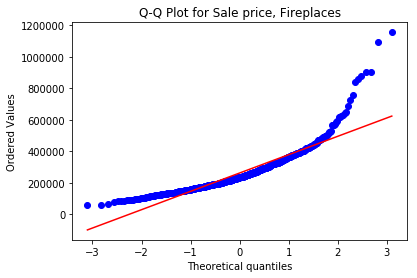

In [11]:
stats.probplot((fpsale),dist='norm',plot=plt)
plt.title('Q-Q Plot for Sale price, Fireplaces')
plt.show()

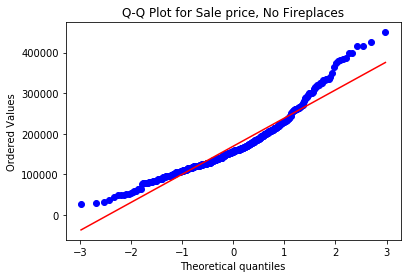

In [12]:
stats.probplot((nfpsale),dist='norm',plot=plt)
plt.title('Q-Q Plot for Sale price, No Fireplaces')
plt.show()

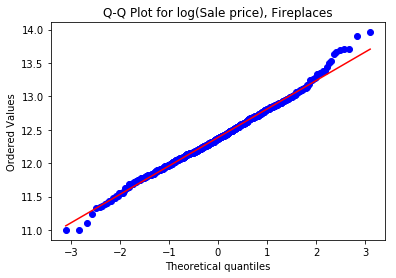

In [13]:
stats.probplot(np.log(fpsale),dist='norm',plot=plt)
plt.title('Q-Q Plot for log(Sale price), Fireplaces')
plt.show()

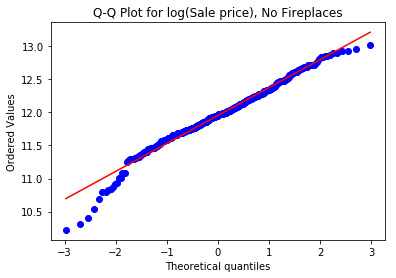

In [14]:
stats.probplot(np.log(nfpsale),dist='norm',plot=plt)
plt.title('Q-Q Plot for log(Sale price), No Fireplaces')
plt.show()

Compared with the raw data, the log-transformed data holds an approximately normal distribution. 

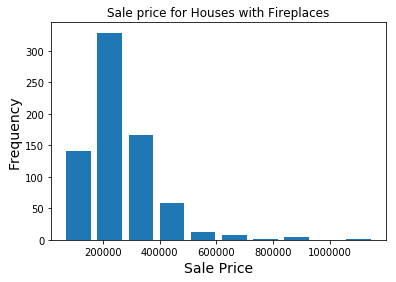

In [15]:
plt.hist(fpsale,rwidth=0.8)
plt.xlabel('Sale Price',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Sale price for Houses with Fireplaces');

The lack of symmetry is especially evident in this sample

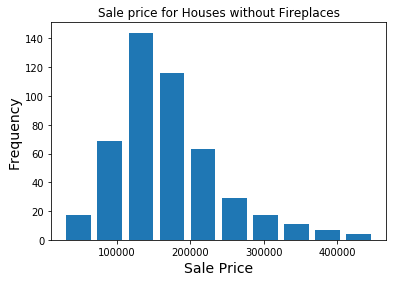

In [16]:
plt.hist(nfpsale,rwidth=0.8)
plt.xlabel('Sale Price',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Sale price for Houses without Fireplaces');

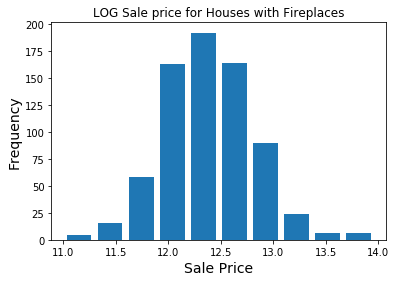

In [17]:
plt.hist(np.log(fpsale), rwidth=0.8)
plt.xlabel('Sale Price',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('LOG Sale price for Houses with Fireplaces');

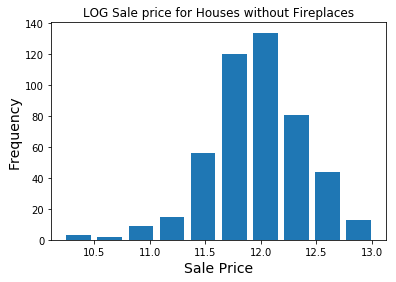

In [18]:
plt.hist(np.log(nfpsale), rwidth=0.8)
plt.xlabel('Sale Price',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('LOG Sale price for Houses without Fireplaces');

In [19]:
def welch_ttest(x, y): 
    ttest, pvalue = stats.ttest_ind(x,y,equal_var = False)
    dof = (x.var()/x.size+y.var()/y.size)**2/ ((x.var()/x.size)**2/(x.size-1)+(y.var()/y.size)**2/(y.size-1))  
    print(' The Degrees of Freedom is',dof,'\n',
          'The t-test is',ttest,'\n',
          'The pvalue is',pvalue)

In [20]:
print(' T-test with log transformation')
welch_ttest(np.log(fpsale),np.log(nfpsale))

 T-test with log transformation
 The Degrees of Freedom is 1019.6496690089525 
 The t-test is 17.153460301461184 
 The pvalue is 3.84700919200458e-58


In [21]:
print(' T-test without log transformation')
welch_ttest((fpsale),(nfpsale))

 T-test without log transformation
 The Degrees of Freedom is 1172.3456909906579 
 The t-test is 16.256578767501356 
 The pvalue is 9.593813331944524e-54


In [22]:
def z_test(x,y):
    zvalue = (np.mean(x)-np.mean(y))/np.sqrt(x.var()/x.size+y.var()/y.size)
    print('z-value is',zvalue)

In [23]:
print('Z-test with log transformation ')
z_test(np.log(fpsale),np.log(nfpsale))

Z-test with log transformation 
z-value is 17.1534603014604


In [24]:
print('Z-test without log transformation')
z_test((fpsale),(nfpsale))

Z-test without log transformation
z-value is 16.256578767501363


Z-statistic is 16.257 by using raw data. Although it results in rejecting the null hypothesis,it is worth noting that the value of this test statistic is less than the prior test statistic obtained from the log-transformed data. 

Using F-test to compare the variance to determine the type of t-test (equal or unequal variance)

In [25]:
def f_test(x,y):
    F=x.var()/y.var() #ratio of variances 
    df1=x.size-1
    df2=y.size-1
    p_value = (1- stats.f.cdf(F, df1, df2))*2
    print(' The ratio of variances is ', F,'\n',
         'The p-value is ', p_value)


In [26]:
f_test(np.log(fpsale),np.log(nfpsale))

 The ratio of variances is  1.0021482816705944 
 The p-value is  0.9840658894202041


Since the p-value > 0.05, we proceed with a t-test assuming equal variances between groups

In [27]:
ttest_true, pvalue_true = stats.ttest_ind(np.log(fpsale),np.log(nfpsale),equal_var = True)

In [28]:
    print(' The t-test is',ttest_true,'when vars are equal\n',
          'The pvalue is',pvalue_true,'when vars are equal ')

 The t-test is 17.149684448478748 when vars are equal
 The pvalue is 4.003516355622301e-59 when vars are equal 


In [42]:
def confidence_interval(x,y):
    CI = sms.CompareMeans(sms.DescrStatsW(x), sms.DescrStatsW(y))
    print('The confidence interval is',cm.tconfint_diff(usevar='pooled'))
confidence_interval(np.log(fpsale),np.log(nfpsale))

The confidence interval is (0.3815598970083889, 0.4801394161372927)


The resulting test statistic in comparing the two means was approximately 17.15, associated with a p-value close to zero. 

Since p-vale < 0.05, we reject H0, and conclude that there is sufficient evidence that sale prices are greater for homes in Saratoga with fireplaces than for homes without them. 

The 95% confidence interval for the difference in the logs of the means, (0.3816, 0.4801), reflects this decision.
